<a href="https://colab.research.google.com/github/DenyT17/Football_Object_Detection/blob/main/Football_Object_Detection_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install ultralytics
import math
from typing import Generator
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import cv2 as cv
from google.colab import drive
%matplotlib inline

drive.mount('/content/gdrive')

ROOT_DIR = '/content/gdrive/My Drive/Football_Detection'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
model = YOLO("/content/gdrive/My Drive/Football_Detection/runs/detect/train2/weights/best.pt")

In [16]:
video = "/content/gdrive/My Drive/Football_Detection/video/Why Teamwork is important in Football.mp4"


In [16]:
from __future__ import annotations
from ultralytics import YOLO
from dataclasses import dataclass, field
import math
import numpy as np
from typing import Tuple, Optional, List, Dict, Any

@dataclass(frozen=True)
class Rect:
    x: float
    y: float
    width: float
    height: float

@dataclass
class Detection:
    rect:Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_results(cls, pred: np.ndarray, names: List[str]) -> List[Detection]:
        result = []
        for r in pred:
          boxes = r.boxes
          for box in boxes:
            class_id = int(box.cls[0])
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            result.append(Detection(
                rect=Rect(
                    x=float(x1),
                    y=float(y1),
                    width=float(x2 - x1),
                    height=float(y2 - y1)
                ),
                class_id=class_id,
                class_name=names[class_id],
                confidence=math.ceil((box.conf[0] * 100)) / 100
            ))
        return result
  

In [43]:
img = cv.imread("/content/gdrive/My Drive/Football_Detection/test/images/40cd38_7_6_png.rf.dc7957fcce915bc48188f18a7b19455b.jpg")
prediction = model(img)
detections = Detection.from_results(
    pred=prediction,
    names=model.names)
print(detections)


0: 640x640 19 players, 2 referees, 17.5ms
Speed: 2.9ms preprocess, 17.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[Detection(rect=Rect(x=878.0, y=708.0, width=25.0, height=72.0), class_id=2, class_name='player', confidence=0.92, tracker_id=None), Detection(rect=Rect(x=1212.0, y=743.0, width=20.0, height=73.0), class_id=2, class_name='player', confidence=0.91, tracker_id=None), Detection(rect=Rect(x=1165.0, y=802.0, width=25.0, height=82.0), class_id=2, class_name='player', confidence=0.89, tracker_id=None), Detection(rect=Rect(x=719.0, y=936.0, width=26.0, height=97.0), class_id=2, class_name='player', confidence=0.89, tracker_id=None), Detection(rect=Rect(x=1123.0, y=728.0, width=24.0, height=76.0), class_id=2, class_name='player', confidence=0.89, tracker_id=None), Detection(rect=Rect(x=428.0, y=646.0, width=15.0, height=56.0), class_id=2, class_name='player', confidence=0.87, tracker_id=None), Detection(rect=Rect(x=531.0, y=733.0, width=17.0, height=76.0), class_id=2, class_name='player', confidence=0.86, tracker_id=None), Detection(rect=Rect(x=508.0, y=566.0, width=19.0, height=50.0), class_id

In [44]:
@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int
        
    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

def draw_shape(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
  center_x = int(rect.x + rect.width/2)
  center_y = int(rect.y + rect.height)
  cv.ellipse(
      image,
      center=(center_x,center_y),
      axes=(int(rect.width), int(0.4 * rect.width)),
      angle=0.0,
      startAngle=-45,
      endAngle=235,
      color=color,
      thickness=thickness,
      lineType=cv.LINE_4
  )
  return image
@dataclass
class BaseAnnotator:
    colors: Color
    thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_shape(
                image=image,
                rect=detection.rect,
                color=self.colors[detection.class_id],
                thickness=self.thickness
            )
        return annotated_image

def plot_image(image: np.ndarray, size: int = 12) -> None:
  plt.figure(figsize=(size, size))
  plt.imshow(image[...,::-1])
  plt.show()

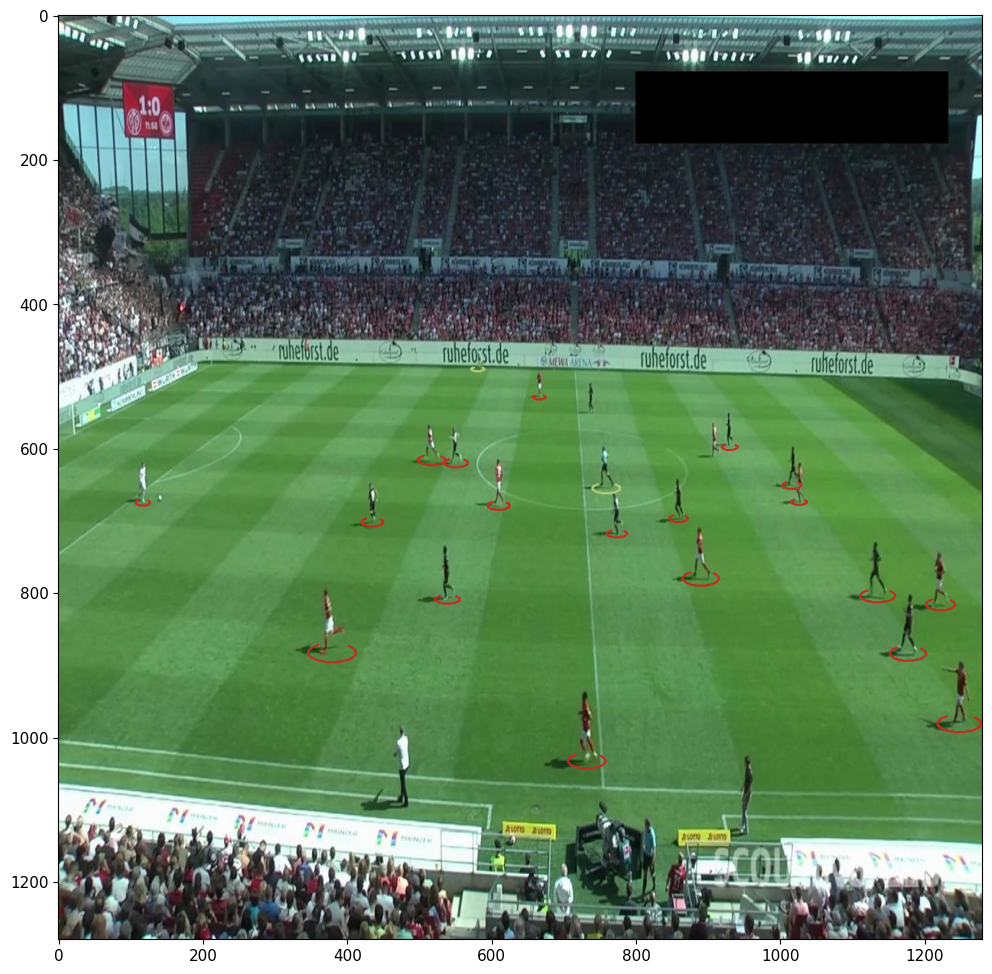

In [45]:
import random
Ball_color = tuple(random.sample(range(0, 255), 3))
Goalkeeper_color = tuple(random.sample(range(0, 255), 3))
Players_color = tuple(random.sample(range(0, 255), 3))
Refrees_color = tuple(random.sample(range(0, 255), 3))

Colors = [
    Ball_color,
    Goalkeeper_color,
    Players_color,
    Refrees_color   
]

annotator = BaseAnnotator(
    colors=Colors, 
    thickness=2)

image_with_detection = annotator.annotate(
    image=img, 
    detections=detections)

plot_image(image_with_detection)